In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
Y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [4]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['Y'] = Y

In [5]:
df.head()

,X,Y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [14]:
X.shape[0]

100

Text(0.5, 1.0, 'X vs Y')

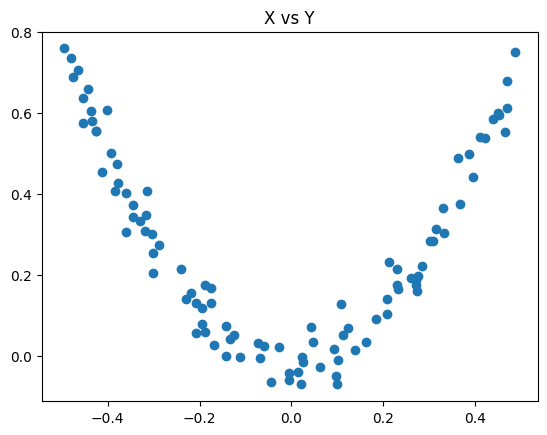

In [6]:
plt.scatter(df['X'] , df['Y'])
plt.title('X vs Y')

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
class GBoost:
    def __init__(self , max_iter=100):
        self.max_iter = max_iter
        self.fm = None
    
    def fit_predict(self , X , Y):
        size = X.shape[0]
        fm_1 = [Y.mean()] * size
        for m in range(0 , self.max_iter):
            res = Y - fm_1
            dt = DecisionTreeRegressor(max_depth=4)
            dt.fit(X , res)
            pred = dt.predict(X)
            fm_1 = fm_1 + pred
        return fm_1

In [36]:
gb = GBoost(max_iter=2)
X = df['X'].values.reshape(-1,1)
Y = df['Y'].values
y_pred = gb.fit_predict(X , Y)

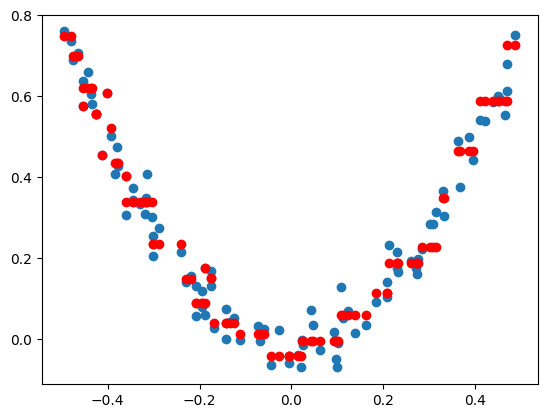

In [37]:
plt.scatter(X,Y)
plt.scatter(X,y_pred,color='red')

In [38]:
from sklearn.metrics import r2_score
r2_score(Y , y_pred)

0.9824859073505905